In [1]:
import pandas as pd
import numpy as np

## Exercise 8.1

In [2]:
def f_hat_k(x, k, database):
    distances = []
    for point in database:
        distances.append(manhattan_distance(x, database[point]))
    distances.sort()
    radius = distances[k-1]
    density = k/(len(database)*(2*(radius * radius)))
    
    if distances[k-1] == distances[k]:
        new_k = 0
        while distances[new_k] <= distances[k-1]:
            new_k += 1
        density = f_hat_k(x, new_k, database)
    
    return density

In [3]:
def f_hat_e(x, e, database):
    distances = []
    for point in database:
        distances.append(manhattan_distance(x, database[point]))
    distances.sort() 
    radius = e
    
    k = 0
    while distances[k] <= e:
        k +=1
    density = k/(20*(2*(radius * radius)))
    
    return density

In [4]:
def manhattan_distance(a, b):
    s = 0
    for i in range(len(a)):
        s += np.abs(a[i] - b[i])
    return s

In [5]:
d = {
    'a':[1,1],
    'b':[2,1],
    'c':[1,2],
    'd':[2,2],
    'e':[3,5],
    'f':[3,9],
    'g':[3,10],
    'h':[4,10],
    'i':[4,11],
    'j':[5,10],
    'k':[7,10],
    'l':[10,9],
    'm':[10,6],
    'n':[9,5],
    'o':[10,5],
    'p':[11,5],
    'q':[9,4],
    'r':[10,4],
    's':[11,4],
    't':[10,3]
}

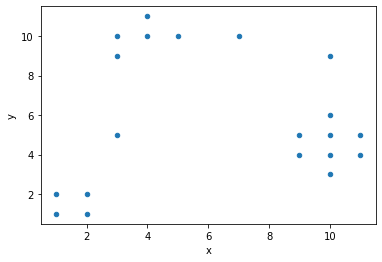

In [6]:
df = pd.DataFrame(d).T
df.columns = ['x', 'y']
df.plot.scatter(x = 'x', y = 'y');

In [7]:
k2 = []
k4 = []
e1 = []
e2 = []
index = []
for i in d:
    index.append(i)
    k2.append(f_hat_k(d[i], 2, d))
    k4.append(f_hat_k(d[i], 4, d))
    e1.append(f_hat_e(d[i], 1, d))
    e2.append(f_hat_e(d[i], 2, d))

In [8]:
tab = pd.DataFrame(np.transpose([k2, k4, e1, e2]), index = index, columns = ['k = 2', 'k = 4', 'e = 1', 'e = 2'])

tab

,k = 2,k = 4,e = 1,e = 2
a,0.075000,0.025000,0.075,0.02500
b,0.075000,0.025000,0.075,0.02500
c,0.075000,0.025000,0.075,0.02500
d,0.075000,0.025000,0.075,0.02500
e,0.004687,0.006000,0.025,0.00625
f,0.050000,0.013889,0.050,0.01875
g,0.075000,0.031250,0.075,0.03125
h,0.100000,0.100000,0.100,0.03125
i,0.050000,0.025000,0.050,0.02500
j,0.050000,0.031250,0.050,0.03125


<IPython.core.display.Javascript object>

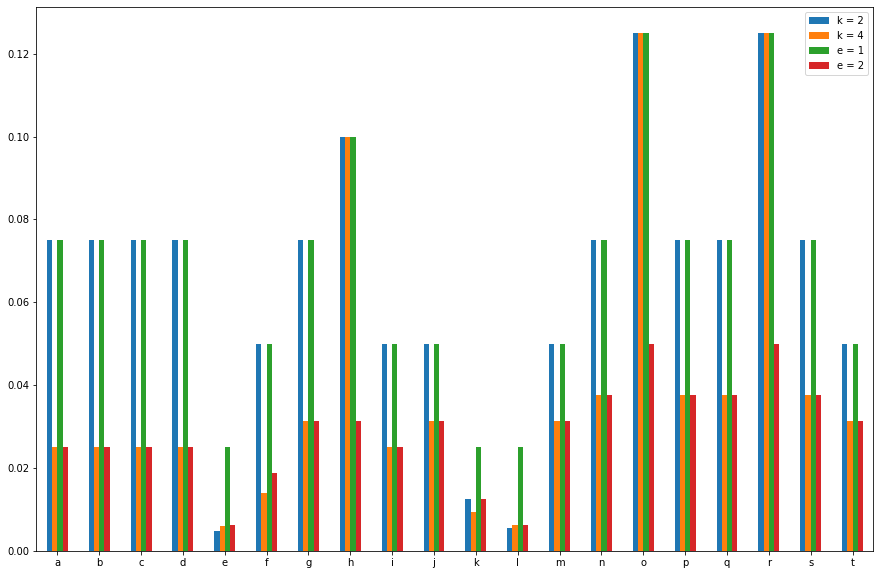

In [9]:
tab.plot.bar(figsize = (15,10))
plt.xticks(rotation = 0);